# backpack problem

> Given a set of different items, each one with an associated value and weight, determine which items you should pick in order to maximize the value of the items without surpassing the capacity of your backpack.

Input: N = 3, W = 4, profit[] = {1, 2, 3}, weight[] = {4, 5, 1}
Output: 3

Explanation: There are two items which have weight less than or equal to 4. If we select the item with weight 4, the possible profit is 1. And if we select the item with weight 1, the possible profit is 3. So the maximum possible profit is 3. Note that we cannot put both the items with weight 4 and 1 together as the capacity of the bag is 4.

Input: N = 3, W = 3, profit[] = {1, 2, 3}, weight[] = {4, 5, 6}
Output: 0

In [375]:
def backpack_rec(W: int, n: int, w: list, v: list) -> int:
    """Returns the maximum value that can be put in a knapsack of capacity W"""
    # no more space or items
    if n == -1 or W <= 0:
        return 0

    curr_weight = w[n - 1]
    curr_value = v[n - 1]

    # item weight doesn't fit, move to the next one
    if curr_weight > W:
        return backpack_rec(W, n - 1, w, v)

    backpack_with_next_items = backpack_rec(W, n - 1, w, v)
    backpack_with_curr = curr_value + backpack_rec(W - curr_weight, n - 1, w, v)
    return max(backpack_with_next_items, backpack_with_curr)


W = 50
v = [100, 60, 120]
w = [20, 10, 30]
n = len(v)

print(backpack_rec(W, n, w, v))

220


In [376]:
def backpack_dyn(W: int, n: int, w: list, v: list) -> int:
    """Returns the maximum value that can be put in a knapsack of capacity W"""
    # define memory for storing intermediate values
    global memory
    memory = [[-1 for i in range(W + 1)] for j in range(n + 1)]

    backpack_dyn_inner(W, n, w, v)


def backpack_dyn_inner(W: int, n: int, w: list, v: list) -> int:
    # check for stored value in memory
    if memory[n][W] != -1:
        return memory[n][W]

    # no more space or items
    if n == -1 or W <= 0:
        res = 0
    else:
        curr_weight = w[n - 1]
        curr_value = v[n - 1]

        # item weight doesn't fit
        if curr_weight > W:
            res = backpack_dyn_inner(W, n - 1, w, v)
        else:
            backpack_with_next_items = backpack_dyn_inner(W, n - 1, w, v)
            backpack_with_curr = curr_value + backpack_dyn_inner(W - curr_weight, n - 1, w, v)
            res = max(backpack_with_next_items, backpack_with_curr)

    memory[n][W] = res
    return res


W = 50
v = [60, 100, 120]
w = [10, 20, 30]
n = len(v)

print(backpack_rec(W, n, w, v))

220


In [377]:
import timeit
import numpy as np


def get_params(n: int):
    '''Given an amount of element in the bag, defines a new weight for the bag and items its value and weight'''
    return (
        np.random.randint(n, 2 * n),
        n,
        list(np.random.randint(0.1 * n, 1.5 * n, size=n)),
        list(np.random.randint(0.1 * n, 1.5 * n, size=n)),
    )


execution_time_rec = []
execution_time_dyn = []
input_sizes = list(range(4, 40, 2))

for n in input_sizes:
    params = get_params(n)
    execution_time_rec.append(timeit.timeit(lambda: backpack_rec(*params), number=10))
    execution_time_dyn.append(timeit.timeit(lambda: backpack_dyn(*params), number=10))

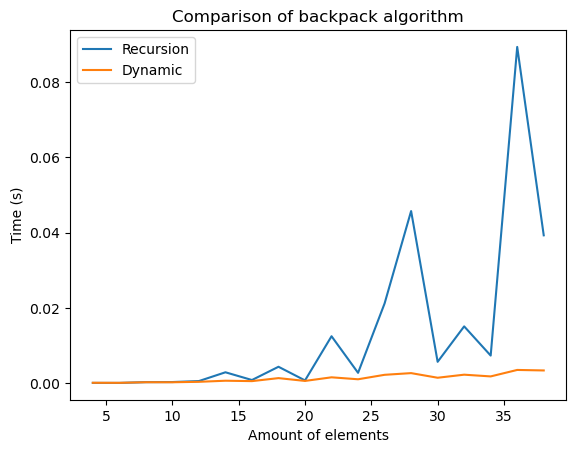

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", "use_inf_as_na")

sns.lineplot(x=input_sizes, y=execution_time_rec, label="Recursion")
sns.lineplot(x=input_sizes, y=execution_time_dyn, label="Dynamic")

plt.xlabel("Amount of elements")
plt.ylabel("Time (s)")
plt.title("Comparison of backpack algorithm")

plt.show()